### Initialize notebook

In [1]:
import math
import os

os.chdir('/home/ak/PycharmProjects/ature/')
import random
from random import shuffle

import numpy as np
from scipy.ndimage.measurements import label
from skimage.morphology import skeletonize

import utils.img_utils as imgutils
from commons.IMAGE import Image
from neuralnet.datagen import Generator
from neuralnet.utils.measurements import get_best_thr
import cv2
from PIL import Image as IMG

sep = os.sep

In [3]:
from neuralnet.unet.runs import DRIVE as DU
from neuralnet.thrnet.runs import DRIVE as DT

In [4]:
image = Image()

In [32]:
image.load_file(data_dir=DT['Dirs']['image'], file_name='11_test.png')
image.load_ground_truth(gt_dir=DT['Dirs']['truth'], fget_ground_truth=DT['Funcs']['truth_getter'])
image.res['org'] = imgutils.get_image_as_array(DU['Dirs']['image'] + '/' + '11_test.tif')[:,:,1]

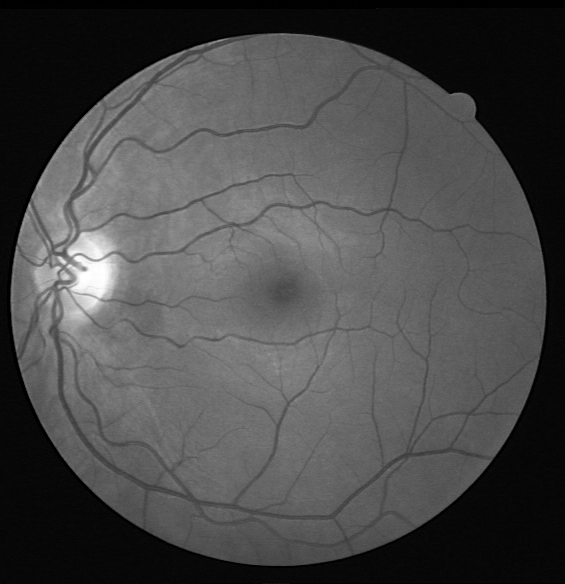

In [33]:
IMG.fromarray(image.res['org'])

(1113, 7)

In [152]:
patches = np.loadtxt('patch_check.csv', delimiter=',')

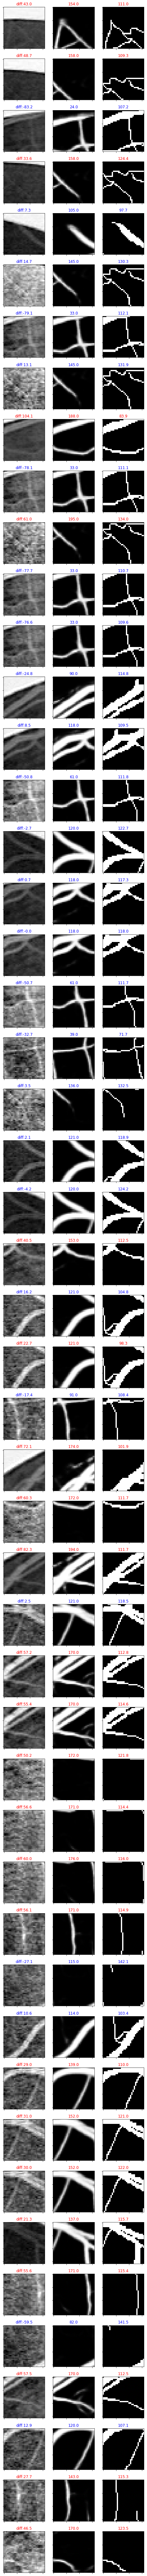

In [170]:
num = 50
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,150)
f, axarr = plt.subplots(num,3)
for i in range(num):
    x, y, diff, a, b, c, d = patches[i]
    a, b, c, d = int(a), int(b), int(c), int(d)
    cl = 'r' if diff >= 20 else 'b'
    
    axarr[i, 0].imshow(255-image.res['org'][a:b,c:d], cmap='gray')
    axarr[i, 0].set_title('diff:' + str(diff), color=cl)
    axarr[i, 0].set_yticklabels([])
    axarr[i, 0].set_xticklabels([])
    
    axarr[i, 1].imshow(image.image_arr[a:b,c:d], cmap='gray')
    axarr[i, 1].set_title(str(x), color=cl)
    axarr[i, 1].set_yticklabels([])
    axarr[i, 1].set_xticklabels([])
    
    axarr[i, 2].imshow(image.ground_truth[a:b,c:d], cmap='gray')
    axarr[i, 2].set_title(str(y), color=cl)
    axarr[i, 2].set_yticklabels([])
    axarr[i, 2].set_xticklabels([])